<a href="https://colab.research.google.com/github/Asif1310/3008/blob/main/EDA_on_Cricket_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let us begin our journey towards the center of the cricketing world!

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("All_International_Cricket_Innings2.csv", parse_dates = ['Start Date']) # To ensure that the start date column is imported with correct datatype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192347 entries, 0 to 192346
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  192347 non-null  int64         
 1   Player      192347 non-null  object        
 2   Runs        192347 non-null  object        
 3   Mins        192347 non-null  object        
 4   BF          192347 non-null  object        
 5   4s          192347 non-null  object        
 6   6s          192347 non-null  object        
 7   SR          192347 non-null  object        
 8   Inns        192347 non-null  object        
 9   Unnamed: 8  0 non-null       float64       
 10  Opposition  192347 non-null  object        
 11  Ground      192347 non-null  object        
 12  Start Date  192347 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 19.1+ MB


Columns "Unnamed: 0" and "Unnamed: 8" do not have any useful information, so let us drop them 

In [4]:
df.drop(['Unnamed: 8', 'Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df.head()

,Player,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date
0,TWM Latham (NZ),0,5,6,0,0,0,1,Test v England,Leeds,2022-06-23
1,WA Young (NZ),20,57,42,2,0,47.61,1,Test v England,Leeds,2022-06-23
2,KS Williamson (NZ),31,97,64,5,0,48.43,1,Test v England,Leeds,2022-06-23
3,DP Conway (NZ),26,100,62,5,0,41.93,1,Test v England,Leeds,2022-06-23
4,HM Nicholls (NZ),19,137,99,1,0,19.19,1,Test v England,Leeds,2022-06-23


I noticed that the "Runs" column has a little asterik to signal that the player is not out in that particular innings. Let us define a new column "is_out" to capture this information.

In [6]:
df.loc[df['Runs'].str.contains('\*'), 'is_out'] = False
df['is_out'].fillna(True, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192347 entries, 0 to 192346
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Player      192347 non-null  object        
 1   Runs        192347 non-null  object        
 2   Mins        192347 non-null  object        
 3   BF          192347 non-null  object        
 4   4s          192347 non-null  object        
 5   6s          192347 non-null  object        
 6   SR          192347 non-null  object        
 7   Inns        192347 non-null  object        
 8   Opposition  192347 non-null  object        
 9   Ground      192347 non-null  object        
 10  Start Date  192347 non-null  datetime64[ns]
 11  is_out      192347 non-null  bool          
dtypes: bool(1), datetime64[ns](1), object(10)
memory usage: 16.3+ MB


Let us strip all special characters and white spaces from the numeric columns

In [8]:
cols = ['Runs','Mins','BF','4s','6s','SR','Inns']
df[cols] = df[cols].apply(lambda x: x.str.replace(r'[^0-9]+', ''))
df[cols] = df[cols].apply(lambda x: x.str.strip())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [9]:
df.shape

(192347, 12)

For some rows, numeric columns consist of blank strings. These are not null values because data is not actually missing. In these cases, those respective players did not get a chance to bat in that innings. Hence, we can safely drop all such rows before converting the numeric values to float datatype.

NOTE: We cannot impute zero values for these blank strings because genuine ducks (players dismissed at zero) would get mixed up with this data.

In [10]:
for i in cols:
  df = df[df[i] != '']
  df = df.astype({i :'float64'})

In [11]:
df.shape

(125309, 12)

In [12]:
df.dtypes

Player                object
Runs                 float64
Mins                 float64
BF                   float64
4s                   float64
6s                   float64
SR                   float64
Inns                 float64
Opposition            object
Ground                object
Start Date    datetime64[ns]
is_out                  bool
dtype: object

Data in the player column is a blend of a player's name and the nationality which is enclosed in the brackets. Let us split these into new features that separate the name and nationality.

In [13]:
df_new = df['Player'].str.split('(', expand = True)
df_new.head()

,0,1,2
0,TWM Latham,NZ),None
1,WA Young,NZ),None
2,KS Williamson,NZ),None
3,DP Conway,NZ),None
4,HM Nicholls,NZ),None


In [14]:
df_new[1] = df_new[1].str.replace(')','')
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,0,1,2
0,TWM Latham,NZ,None
1,WA Young,NZ,None
2,KS Williamson,NZ,None
3,DP Conway,NZ,None
4,HM Nicholls,NZ,None


In [15]:
df['Name'] = df_new[0].str.strip()
df['Nation'] = df_new[1].str.strip()
df.drop(['Player'], axis = 1, inplace = True) # dropping Player column because we already appended Name and Nation columns to the dataframe which makes the data in Player column redundant.
df.head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
0,0.0,5.0,6.0,0.0,0.0,0.0,1.0,Test v England,Leeds,2022-06-23,True,TWM Latham,NZ
1,20.0,57.0,42.0,2.0,0.0,4761.0,1.0,Test v England,Leeds,2022-06-23,True,WA Young,NZ
2,31.0,97.0,64.0,5.0,0.0,4843.0,1.0,Test v England,Leeds,2022-06-23,True,KS Williamson,NZ
3,26.0,100.0,62.0,5.0,0.0,4193.0,1.0,Test v England,Leeds,2022-06-23,True,DP Conway,NZ
4,19.0,137.0,99.0,1.0,0.0,1919.0,1.0,Test v England,Leeds,2022-06-23,True,HM Nicholls,NZ


# The grit and patience of Brian Lara

Before diving in, one thing I can tell even in my sleep is the maximum individual score ever scored in a cricket innings. It is Brian Lara's classic 400 against England. Let us confirm if this dataset contains that record.

In [16]:
df[df['Runs'] == df['Runs'].max()].head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
116856,400.0,778.0,582.0,43.0,4.0,6872.0,1.0,Test v England,St John's,2004-04-10,False,BC Lara,WI


Lara stayed in crease for 778 minutes (that's roughly 13 hrs). That's an enormous display of patience from one of the greatest players in Cricket. Let us see if anyone else crossed this 13 hr threshold, I am curious to find out if they all came closer to Brian Lara's score!

In [17]:
df[df['Mins'] > 778.0].head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
52327,263.0,836.0,528.0,18.0,0.0,4981.0,2.0,Test v Pakistan,Abu Dhabi,2015-10-13,True,AN Cook,ENG
71128,311.0,790.0,529.0,35.0,0.0,5879.0,2.0,Test v England,The Oval,2012-07-19,False,HM Amla,SA
138348,275.0,878.0,642.0,26.0,0.0,4283.0,3.0,Test v England,Durban,1999-12-26,True,G Kirsten,SA
149392,340.0,799.0,578.0,36.0,2.0,5882.0,2.0,Test v India,Colombo (RPS),1997-08-02,True,ST Jayasuriya,SL


Wow, first thing that comes to my mind when I see Gary Kirsten's name is India's 2011 world cup victory (he coached that Indian team), now I have a different reason in the form of his 878 minutes long innings to remember his name.

I am not surprised to see Cook and Amla in this list, but Sanath Jayasuriya is a pleasant surprise. I always considered Jayasuriya an aggressive batsmen. Maybe those 799 minutes were filled with a fine balance between aggression and patience!

# Do cricket players love a good old duck?

Now, let us take a look at the most common score in this list!

In [18]:
df['Runs'].value_counts()

0.0      13313
1.0       7166
2.0       5361
4.0       4871
5.0       4178
         ...  
262.0        1
269.0        1
251.0        1
317.0        1
280.0        1
Name: Runs, Length: 293, dtype: int64

I am a little surprised that many innings have a score of zeroes and ones. But I am sure that most of these cases are not outs.

# A trick to determine whether a batsman's performance in a match is above or below the average!

Let us go ahead and apply functions to find everyone's favorite statistical measures of central tendency and variability for numeric data!

In [19]:
df['Runs'].mean()

24.31649761788858

In [20]:
df['Runs'].median()

13.0

In [21]:
df['Runs'].std()

30.377813974971925

# Am I mad to use MAD as a measure of variability?

Standard deviation is greater than mean here. It is a no-brainer that these measures are affected by extreme values to a great extent, let us try to compute trimmed mean (it trims the top 10% and bottom 10% of extreme values to calculate mean), and MAD (it is mad that people don't use Median Absolute Deviation from Median more often than standard deviation as it is less affected by outliers).

In [22]:
from scipy import stats

#calculate 10% trimmed mean
stats.trim_mean(df['Runs'], 0.1)

18.411585152969106

In [23]:
from statsmodels import robust

robust.mad(df['Runs'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


17.791226622067224

So, we could safely assume that the average score of a player in each inning to lie around the 20 mark. Every time a player crosses this mark, their performance is above average as per statistics and we should not blame them! (unless they take 100 balls to reach that mark in an ODI match).


# What has a long tail, but is not a dog or a horse?

Let us try to view the data distribution of the Runs column via a box plot

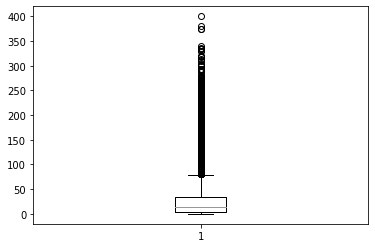

In [24]:
fig, ax = plt.subplots()
ax.boxplot(df['Runs'])
plt.show()

This confirms a heavily right skewed distribution with a very long tail! (Brian Lara's 400 is roughly 10 to 15 times away from the mean in terms of standard deviation.)

Let us take a look at various percentiles within this data!

In [25]:
for i in [10,20,30,40,50,60,70,80,90,95,99]:
  print(str(i) + "th percentile - "+ str(np.percentile(df['Runs'],i)))

10th percentile - 0.0
20th percentile - 2.0
30th percentile - 5.0
40th percentile - 9.0
50th percentile - 13.0
60th percentile - 20.0
70th percentile - 28.0
80th percentile - 41.0
90th percentile - 63.0
95th percentile - 85.0
99th percentile - 138.0


A player is in 99th percentile once he or she reaches the 138 run mark! This makes me think that it is greedy to expect Virat Kohli and Rohit Sharma to score a century in every other game).

Let us move a step ahead and view the density via a combination of histogram and density plot (computed via Kernel distribution function as we set KDE parameter to True below).

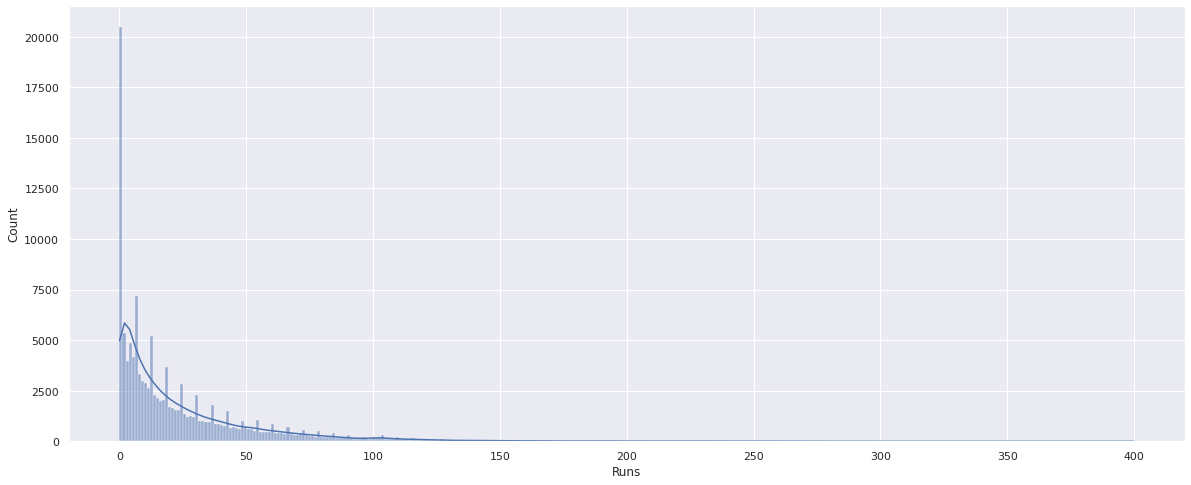

In [26]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(20,8)})
sns.histplot(data = df, x = "Runs", kde = True)


There is an unmistakably lengthy right tail here. All the normal distribution fans might be bummed out looking at it, but let us drop the extreme values above 99th percentile to take a close look at the distribution.

In [27]:
df_cut = df[df['Runs']<135.0] # 99th percentile value is 138.0, I am using 135.0 to cut down this 99th percentile value too from the distribution.
df_cut.shape

(123920, 13)

In [28]:
for i in [10,20,30,40,50,60,70,80,90,95,99]:
  print(str(i) + "th percentile - "+ str(np.percentile(df_cut['Runs'],i)))

10th percentile - 0.0
20th percentile - 2.0
30th percentile - 5.0
40th percentile - 9.0
50th percentile - 13.0
60th percentile - 19.0
70th percentile - 27.0
80th percentile - 39.0
90th percentile - 60.0
95th percentile - 79.0
99th percentile - 113.0


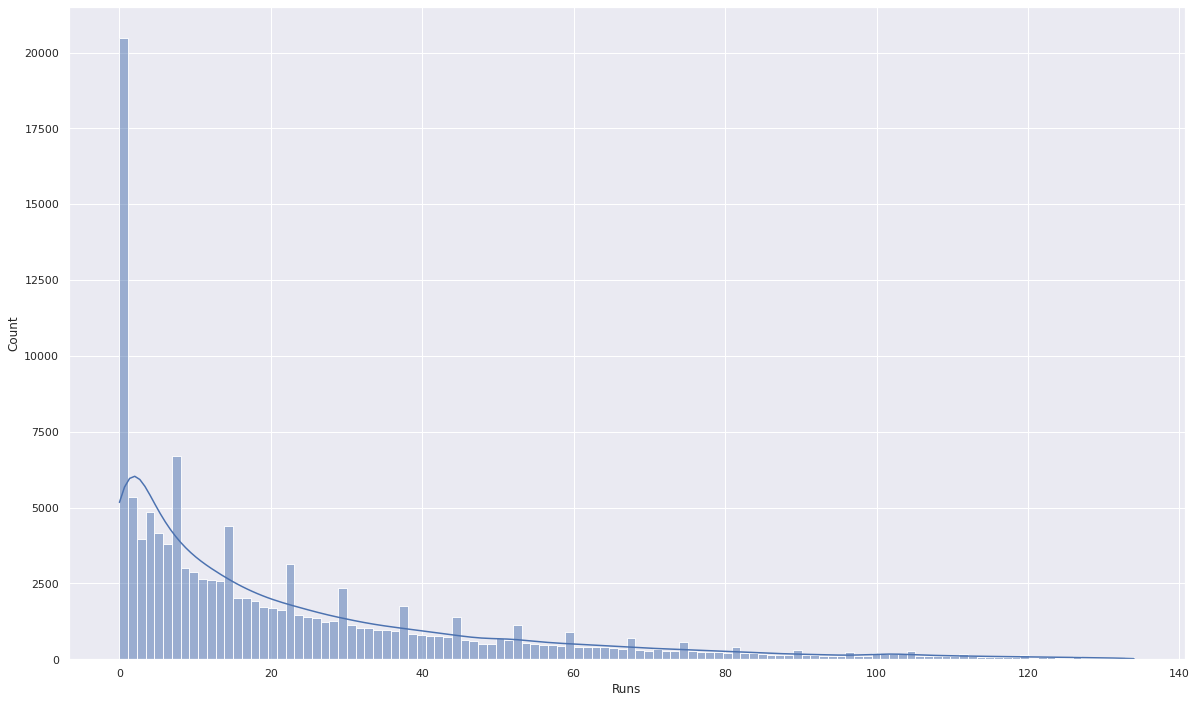

In [29]:
sns.set(rc = {'figure.figsize':(20,12)})
sns.histplot(data = df_cut, x = "Runs", kde = True)

There are occasional peaks in the distribution, but those peaks are arbitrary and caused by chance as per my observation. 

Let us move ahead and view data for the innings where players were dismissed at a fateful 99!

# Sachin Tendulkar and a tale of nervous nineties!

In [30]:
df_cut2 = df_cut[df_cut['Runs'] == 99]
df_cut2.shape

(99, 13)

Wow, there are exact 99 innings which ended at 99. Weird coincidence or a spooky stat?

I have no clue about that, but let us find an answer for the question, "how many of these 99 innings were not outs?"

In [31]:
df_cut2['is_out'].value_counts()

True     80
False    19
Name: is_out, dtype: int64

19 not outs and 80 dismissals! 

Those 19 cases were truly unlucky ones, but I think the nervousness of completing a century played a part in those 80 dismissals.

Now, let us see which nation's fans went through the most agony in terms of witnessing a player miss out on a century!

In [32]:
df_cut2['Nation'].value_counts()

AUS      19
INDIA    14
ENG      13
NZ       11
PAK      11
SA        9
SL        8
WI        5
ZIM       5
IRE       2
UAE       1
SCOT      1
Name: Nation, dtype: int64

Australia, India, and England top almost every stat when it comes to Cricket. So no surprises here!

In [33]:
df_cut2['Name'].value_counts()

SR Tendulkar      3
Misbah-ul-Haq     3
ML Hayden         2
AB de Villiers    2
ADR Campbell      2
                 ..
KP Pietersen      1
MJ Clarke         1
JP Duminy         1
MN Waller         1
Javed Miandad     1
Name: Name, Length: 81, dtype: int64

In [34]:
df_cut2[df_cut2['Name'] == 'SR Tendulkar'].head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
97989,99.0,130.0,91.0,14.0,1.0,10879.0,1.0,ODI v Pakistan,Mohali,2007-11-08,True,SR Tendulkar,INDIA
99518,99.0,158.0,112.0,15.0,1.0,8839.0,1.0,ODI v England,Bristol,2007-08-24,True,SR Tendulkar,INDIA
100222,99.0,199.0,143.0,12.0,0.0,6923.0,1.0,ODI v South Africa,Belfast,2007-06-26,True,SR Tendulkar,INDIA


In [35]:
df_cut2[df_cut2['Name'] == 'Misbah-ul-Haq'].head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
41903,99.0,258.0,201.0,9.0,2.0,4925.0,2.0,Test v West Indies,Bridgetown,2017-04-30,True,Misbah-ul-Haq,PAK
41947,99.0,346.0,223.0,5.0,3.0,4439.0,2.0,Test v West Indies,Kingston,2017-04-21,False,Misbah-ul-Haq,PAK
79292,99.0,310.0,207.0,16.0,0.0,4782.0,2.0,Test v New Zealand,Wellington,2011-01-15,True,Misbah-ul-Haq,PAK


Sachin and Misbah are extremely unfortunate not to add those three innings in their centuries list! At least Misbah might find solace in the fact that he was not out in the 2017 inning vs West Indies, whereas "the God of Cricket" seems to be the only person to be dismissed thrice at 99. 

Guess that 100th century would have happened quite early had it not for these three innings! (Sachin Tendulkar is the only player to score 100 or more runs, 100 times. There was a painfully long wait of one year for him to go from 99 to 100 centuries, but the little master persisted to achieve that remarkable feat!)

Now, let us dig in a bit more and find the innings that ended between 91 and 99 because of the player's dismissal. This is commonly referred to as "nervous 90s" in the popular cricket lingo. This term was again popularized by Sachin Tendulkar himself, so it is only fair that he tops this list too!

In [101]:
df_cut3 = df_cut[df_cut['Runs'] > 90]
df_cut3 = df_cut3[df_cut3['Runs'] < 100]
df_cut3 = df_cut3[df_cut3['is_out'] == True]
df_cut3.shape

(883, 13)

In [102]:
df_cut3['Name'].value_counts()

SR Tendulkar      25
R Dravid          11
RT Ponting        11
AB de Villiers    11
ML Hayden         10
                  ..
LE Bosman          1
OA Shah            1
MA Vermeulen       1
MJ North           1
CH Lloyd           1
Name: Name, Length: 348, dtype: int64

So Sachin Tendulkar it is!

But I am surprised that Rahul Dravid takes the second position in this list.

# Who loves a duck more than Gordon Ramsay on this earth?

Now, let us try to explore the individual statistics of ducks!

In [38]:
df_cut4 = df_cut[df_cut['Runs'] == 0]
df_cut4 = df_cut4[df_cut4['is_out'] == True]
df_cut4.shape

(11894, 13)

In [39]:
df_cut4['Name'].value_counts()

CA Walsh          52
M Muralidaran     52
GD McGrath        48
SCJ Broad         48
ST Jayasuriya     45
                  ..
Zubayr Hamza       1
TK Curran          1
AJ Turner          1
PARP Perera        1
Yashpal Sharma     1
Name: Name, Length: 1991, dtype: int64

I know Courtney Walsh as a fast bowler who could terrify the batsmen on the crease with figurative fire balls. Maybe batsmen won't feel bad when they are dismissed for a duck in the bowling of Walsh when they learn about this stat.

By the way, Murali, McGrath, and Broad are legendary bowlers who got to be on both the giving and receiving ends of ducks!

# The dominance of mighty Aussies in scoring runs!

Let us try to group data on nation column to calculate the total runs scored by each nation in this dataset.

In [40]:
df.groupby('Nation')['Runs'].sum()

Nation
            481.0
1            31.0
2            34.0
3           299.0
AFG       24184.0
AUS      424751.0
Afr        1364.0
Asia       1577.0
Aut         240.0
BAN      126591.0
BMUDA      4034.0
BOT         467.0
Bhm         537.0
CAM         214.0
CAN       10688.0
CZK-R       494.0
Caym        662.0
DEN         215.0
ENG      381943.0
Fin         185.0
GUE         209.0
Ghana       703.0
HKG        2472.0
ICC        1173.0
INDIA    352881.0
IRE       30015.0
JER         258.0
KENYA     20955.0
KUW         331.0
LES         528.0
LUX         261.0
MAL         304.0
MOZ         518.0
MWI         617.0
NAM        2315.0
NED       18679.0
NEPAL      1060.0
NGA         539.0
NZ       302106.0
OMA        1086.0
PAK      307597.0
PNG        1381.0
QAT         307.0
ROM         310.0
RWN         656.0
SA       282525.0
SCOT      16303.0
SEY         511.0
SGP         418.0
SL       283290.0
SLE         313.0
TAN        1377.0
TKY          66.0
UAE        6276.0
UGA        1362.0
USA

Here's a trick question. What are 1, 2, and 3?

They are numbers outside this notebook, but they are apparently nations when it comes to this dataset. 

This is a classic case of erroneous data that requires cleaning. Let us take a look at the data pertaining to these phantom countries before cleaning them!



In [41]:
df[df['Nation'] == '1'].head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
456,6.0,19.0,7.0,1.0,0.0,8571.0,1.0,ODI v West Indies,Multan,2022-06-12,True,Mohammad Wasim,1
756,17.0,31.0,13.0,1.0,1.0,13076.0,1.0,ODI v West Indies,Multan,2022-06-10,False,Mohammad Wasim,1
2601,2.0,12.0,4.0,0.0,0.0,50.0,1.0,T20I v Australia,Lahore,2022-04-05,False,Mohammad Wasim,1
2876,0.0,1.0,1.0,0.0,0.0,0.0,2.0,ODI v Australia,Lahore,2022-03-29,True,Mohammad Wasim,1
5627,5.0,11.0,3.0,1.0,0.0,16666.0,1.0,T20I v West Indies,Karachi,2021-12-14,True,Mohammad Wasim,1


In [42]:
df[df['Nation'] == '2'].head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
26151,10.0,13.0,13.0,1.0,0.0,7692.0,1.0,T20I v Finland,Brondby,2019-07-13,True,Aftab Ahmed,2
75858,1.0,2.0,2.0,0.0,0.0,50.0,1.0,T20I v Zimbabwe,Harare,2011-09-18,True,Rameez Raja,2
75902,23.0,45.0,27.0,2.0,0.0,8518.0,1.0,T20I v Zimbabwe,Harare,2011-09-16,True,Rameez Raja,2


In [43]:
df[df['Nation'] == '3'].head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
454,8.0,17.0,13.0,0.0,0.0,6153.0,1.0,ODI v West Indies,Multan,2022-06-12,True,Mohammad Nawaz,3
753,3.0,13.0,5.0,0.0,0.0,60.0,1.0,ODI v West Indies,Multan,2022-06-10,True,Mohammad Nawaz,3
1007,8.0,12.0,6.0,0.0,1.0,13333.0,2.0,ODI v West Indies,Multan,2022-06-08,False,Mohammad Nawaz,3
5624,1.0,3.0,3.0,0.0,0.0,3333.0,1.0,T20I v West Indies,Karachi,2021-12-14,True,Mohammad Nawaz,3
5647,30.0,15.0,10.0,3.0,2.0,300.0,1.0,T20I v West Indies,Karachi,2021-12-13,False,Mohammad Nawaz,3


Thanks to every one's friendly neighborhood search engine (Google Chrome), I found out the actual nations for these rows. And I just realized that we have a phantom "blank string" country too, let us see what's the deal with them!

In [44]:
df[df['Nation'] == ''].head()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation
8384,31.0,39.0,32.0,4.0,1.0,9687.0,1.0,T20I v Rwanda,Rwanda,2021-10-22,True,C Forbes,
8386,0.0,2.0,1.0,0.0,0.0,0.0,1.0,T20I v Rwanda,Rwanda,2021-10-22,True,Muhammad Amin,
8388,11.0,22.0,12.0,1.0,0.0,9166.0,1.0,T20I v Rwanda,Rwanda,2021-10-22,True,Naeem Gull,
8390,0.0,3.0,2.0,0.0,0.0,0.0,1.0,T20I v Rwanda,Rwanda,2021-10-22,True,J Ghadiyali,
8392,7.0,26.0,12.0,0.0,0.0,5833.0,1.0,T20I v Rwanda,Rwanda,2021-10-22,True,JJ Wright,


Data pertaining to Nation == ' ' represents a qualifier game between the associate nations. We can replace the nation for these as 'rest' as there are only few entries available for them.

In [45]:
df['Nation'] = df['Nation'].replace({'1':'PAK', '2': 'DEN', '3': 'PAK','': 'rest'})

Now, let us find the grouped sum once again!

In [46]:
df.groupby('Nation')['Runs'].sum().sort_values(ascending = False)

Nation
AUS      424751.0
ENG      381943.0
INDIA    352881.0
PAK      307927.0
NZ       302106.0
SL       283290.0
SA       282525.0
WI       281101.0
ZIM      146984.0
BAN      126591.0
IRE       30015.0
AFG       24184.0
KENYA     20955.0
NED       18679.0
SCOT      16303.0
CAN       10688.0
UAE        6276.0
BMUDA      4034.0
HKG        2472.0
NAM        2315.0
Asia       1577.0
PNG        1381.0
TAN        1377.0
Afr        1364.0
UGA        1362.0
ICC        1173.0
OMA        1086.0
NEPAL      1060.0
Ghana       703.0
Caym        662.0
RWN         656.0
MWI         617.0
NGA         539.0
Bhm         537.0
LES         528.0
MOZ         518.0
SEY         511.0
CZK-R       494.0
rest        481.0
BOT         467.0
SGP         418.0
KUW         331.0
SLE         313.0
ROM         310.0
QAT         307.0
MAL         304.0
USA         298.0
LUX         261.0
JER         258.0
DEN         249.0
Aut         240.0
CAM         214.0
GUE         209.0
Fin         185.0
TKY          66.0
Nam

No surprises here! Aussies top the list, with England and India taking the second and third place.

But there has been a lot of discussion in the cricketing world that Aussies lost their dominance in the recent years, and England and India have leapfrogged Australia in many aspects of the game. 

Without a factual basis, this statement is just another biased opinion. Let us try to ask the data its view on this opinion!

# Is it the end of era already for Aussies?

Let us try to extract the year from the Start Date column.

It helps us perform the analysis by grouping data into decades to see how the total runs scored by countries changed over the decades.

In [47]:
df['year'] = df['Start Date'].dt.year

Now, its time to be nostalgic!

Let us seggregate the data for eighties, nineties, 2000s, 2010s, and 2020s.

In [48]:
df_eighties = df[df['year'] > 1980]
df_eighties = df_eighties[df_eighties['year'] < 1990]

In [49]:
assert df_eighties['year'].max() < 1990 and df_eighties['year'].min() > 1980 # to double check that correct years were placed in this group

In [50]:
df_nineties = df[df['year'] >= 1990]
df_nineties = df_nineties[df_nineties['year'] < 2000]

In [51]:
df_2000s = df[df['year'] >= 2000]
df_2000s = df_2000s[df_2000s['year'] < 2010]

In [52]:
df_2010s = df[df['year'] >= 2010]
df_2010s = df_2010s[df_2010s['year'] < 2020]

In [53]:
df_2020s = df[df['year'] >= 2020]
df_2020s = df_2020s[df_2020s['year'] < 2023]

Let us try to confirm that sum of the parts make up the whole here to ensure that no rows are left behind!

In [54]:
print( df_eighties.shape[0] + df_nineties.shape[0] + df_2000s.shape[0] + df_2010s.shape[0] + df_2020s.shape[0])

125309


In [55]:
print(df.shape[0])

125309


Now it's time for us to group the data by Nation in each decade and compare the total runs scored stat with the help of bar charts!

Note that we have restricted only top five countries each decade to depict in the bar chart!

In [56]:
df_plt1 = df_eighties.groupby('Nation')['Runs'].sum().sort_values(ascending = False).head(5)

In [57]:
df_plt2 = df_nineties.groupby('Nation')['Runs'].sum().sort_values(ascending = False).head(5)

In [58]:
df_plt3 = df_2000s.groupby('Nation')['Runs'].sum().sort_values(ascending = False).head(5)

In [59]:
df_plt4 = df_2010s.groupby('Nation')['Runs'].sum().sort_values(ascending = False).head(5)

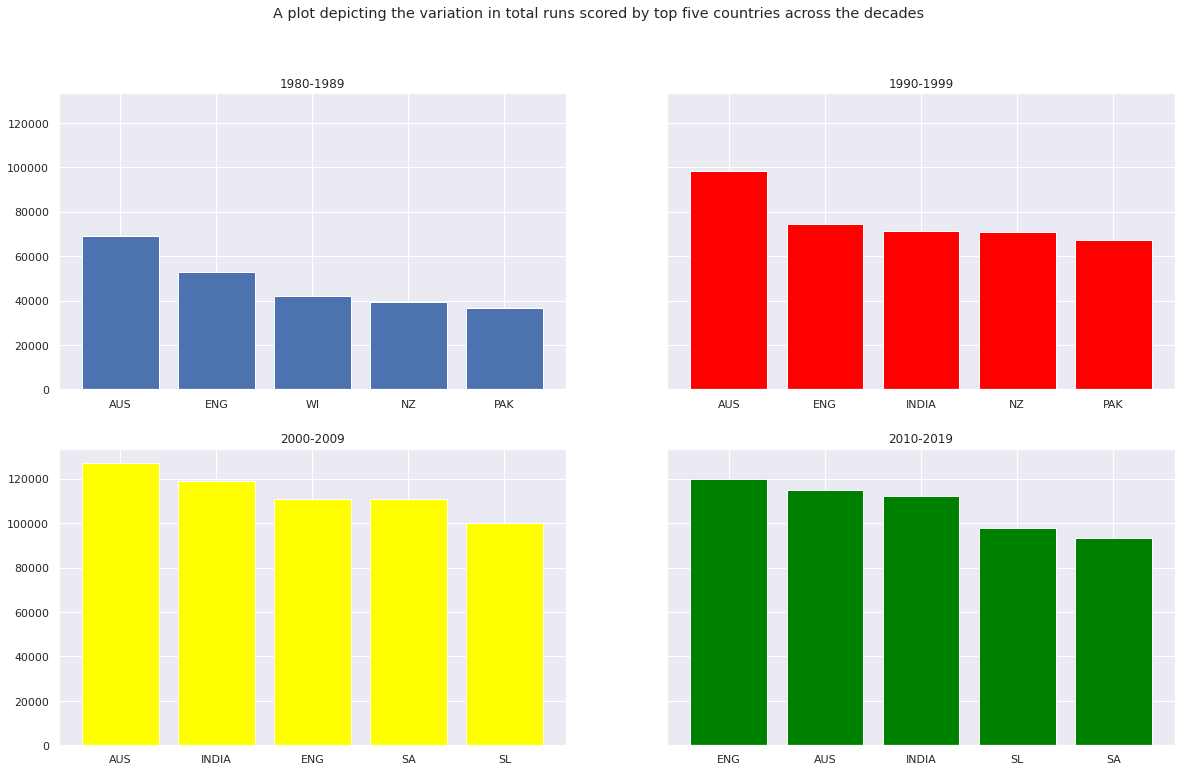

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True)
ax[0,0].bar(df_plt1.index, df_plt1)
ax[0,1].bar(df_plt2.index, df_plt2, color = 'red')
ax[1,0].bar(df_plt3.index, df_plt3, color = 'yellow')
ax[1,1].bar(df_plt4.index, df_plt4, color = 'green')
#ax5.bar(df_plt5.index, df_plt5, color = 'black')
ax[0,0].set_title('1980-1989')
ax[0,1].set_title('1990-1999')
ax[1,0].set_title('2000-2009')
ax[1,1].set_title('2010-2019')
plt.suptitle("A plot depicting the variation in total runs scored by top five countries across the decades")
plt.show()

India is no where in the frame between the years 1980 - 1989, but then 1983 world cup happened. India lifted its first ever world cup during that tournament, which I believe acted as a catalyst for the increase in the popularity of Cricket in India. Several youngsters started to take bats and balls out of their playing room shelfs to emulate the 1983 world cup heroes. It took time for these youngsters to break into the Indian cricket team, but once they started breaking in, the result is that India shone brighter in many vital stats since 1990. 

But coming to the case of Aussies, they did dominate the scoring charts until 2009, but they were relegated to second position from 2010. But they are still an excellent team, they have a cricket world cup win in 2015 to show in the 2010-2019 decade.

One cannot overlook England's consistency in scoring runs (England did produce many classy batsmen like Cook, Strauss, Root, etc in last few decades).

New Zealand and Pakistan are missing in the graph for two decades between 2000 and 2019, which also coincided with the rise of Sri Lanka and South Africa as cricketing powers. But the recent resurgence of Pakistan and New Zealand's cricket teams coupled with the political issues in Sri Lanka and South Africa means it is inevitable for the interchange to happen in the scoring ranks for this decade!



# Were players in the eighties meaner than today's players?

Let me apologize and admit that I am referring to mean in a statistical sense here!

Let us go ahead and try to see if there is any change in the statistical measure of runs scored across the decades.

In [62]:
df_eighties['Runs'].mean()

24.744323106257582

In [63]:
df_nineties['Runs'].mean()

24.029510528187096

In [64]:
df_2000s['Runs'].mean()

24.702186878727634

In [65]:
df_2010s['Runs'].mean()

24.57575450421914

In [66]:
df_2020s['Runs'].mean()

21.641119360365504

Well, 24 seems to be the golden standard of batting average here. Between 2020 to 2022, this average is at 21, so I am expecting higher scores in the next few years until 2029 to compensate for the low average. 

#The era of power hitters

The introduction of T-20 format in Cricket could be considered as vital as the discovery of electromagnetism to Physics!

T-20 condensed the entire game time (which correlated with the shrinking attention spans of its audience) to make cricket more appealing to new generations.

T-20 cricket gave a boost to a new type of batsmen who are comfortable hitting the ball out of the park than playing defence. They are usually called as 'power hitters.'

One of the unique traits of these power hitters is that they often hit more than average number of sixers in a match, but stay for a little time in the crease.

We can find out such power hitters in the dataset based on the below logic:

Their individual average sixers scored per match is more than the average sixers per match for the whole dataset.

Their individual average mins spent in the crease per match is less than the average mins spent per match for the whole dataset.

Let us find the average of 6s column for the whole dataset first:

In [120]:
total_sixer_mean = df['6s'].mean()

Now, let us find this average for each player:

In [121]:
df.groupby('Name').mean()['6s'].sort_values(ascending = False)

Name
S Wickramasekara     6.0
Muhammad Kashif      4.5
H Gori               3.5
Ijaz Hussain         3.0
S Davizi             3.0
                    ... 
KT Sandher           0.0
KS Bagabena          0.0
KPJ Warnaweera       0.0
KP Walmsley          0.0
Zulqarnain Haider    0.0
Name: 6s, Length: 3019, dtype: float64

It would be fallacious if we don't filter this to include only those who scored at least 50 sixers or more

In [125]:
df_six = df.groupby('Name').mean()['6s'].sort_values(ascending = False)[df.groupby('Name').sum()['6s'].sort_values(ascending = False) > 50.0]

Now, let us filter all the entries where average is greater than the value we stored in the variable 'total_sixer_mean.'

In [127]:
df_six = df_six[df_six > total_sixer_mean]

It's time to find the average mins spent for whole dataset:

In [129]:
avg_mins = df['Mins'].mean()

Now, let us filter the players who have lesser individual average for the mins spent column than the average mins spent for whole dataset.

In [130]:
df_min = df.groupby('Name').mean()['Mins'].sort_values(ascending = False)[df.groupby('Name').mean()['Mins'].sort_values(ascending = False) < avg_mins]

We are almost ready to welcome the power hitters, they are at the moment resting behind the door of the inner join between the df_six and df_min dataframes!

In [135]:
df_min = df_min.reset_index()
df_six = df_six.reset_index()


In [139]:
df_pw = pd.merge(df_min, df_six, on = 'Name', how = 'inner')

In [142]:
df_pw = df_pw.sort_values(by = '6s', ascending = False)

In [143]:
df_pw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 26 to 66
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   78 non-null     int64  
 1   Name    78 non-null     object 
 2   Mins    78 non-null     float64
 3   6s      78 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ KB


Well, we unearthed 78 power hitters out of this dataset. Let us take a look at few names!

In [144]:
df_pw.head(20)

,index,Name,Mins,6s
26,216,E Lewis,46.294118,1.431373
48,460,N Pooran,38.032787,1.213115
61,756,C Munro,30.711340,1.206186
45,405,CJ Anderson,39.880952,1.083333
62,776,KA Pollard,30.130435,1.055901
63,784,GJ Maxwell,30.024691,1.055556
73,1208,YK Pathan,22.053571,1.053571
76,1432,AD Russell,18.670330,0.989011
29,229,EJG Morgan,45.616099,0.962848
57,613,HH Pandya,33.873563,0.942529


Wow, no surprise to see the names of Glenn Maxwell, Yusuf Pathan, Shahid Afiridi, and Kieron Pollard in this list!

# The unsung heroes!

Thanks to Christopher Nolan's Dark Knight trilogy, our perception of a hero changed from someone who could kill the bad guys to someone who could perform a heroic and a tear-jerking sacrifice (with Hans Zimmer's epic music playing in the background!)

But the unsung heroes in our dataset are not the ones who died (or got dismissed) early. They are rather the ones who lived long enough to see out the end of the innings! (There are a lot of tailenders who bat at no. 10 & 11 in this list. The fact that it is not them but the other guy who throws away the wicket to end the innings still makes them a hero IMO 😆!)

Let us find out the list of players who remained not out most number of times!

In [68]:
df[df['is_out'] == False]['Name'].value_counts().sort_values(ascending = False).head(10)

JM Anderson      130
MS Dhoni         123
SM Pollock       105
SR Waugh         100
WPUJC Vaas        97
M Muralidaran     95
JH Kallis         93
MV Boucher        84
AD Mathews        83
DL Vettori        81
Name: Name, dtype: int64

Jimmy Anderson is the most unexpected unsung hero ever!

MS Dhoni, Shaun Pollock, Kallis, Boucher, and Angelo Matthews do belong in this exceptional list because of their heroic efforts to save the team despite a batting collapse in several matches.

But I am shocked to see Muralidaran in this list, who knows which other surprises we have in the store!

# Pitting the three formats against each other - T20 vs test vs ODI!

I hate to break it to you, but a severe lack of data in departments other than batting, and the extreme fatigue being faced by me currently means there isn't much scope to do a detailed analysis in each of the three formats.

But before we see what we can do, let us try to extract the format data from the opposition column!

In [69]:
df['Opposition'].unique()

array(['Test v England', 'Test v New Zealand', 'ODI v England',
       'ODI v Netherlands', 'ODI v Australia', 'ODI v Sri Lanka',
       'T20I v South Africa', 'T20I v India', 'Test v West Indies',
       'Test v Bangladesh', 'T20I v Zimbabwe', 'T20I v Afghanistan',
       'ODI v West Indies', 'ODI v Pakistan', 'T20I v Sri Lanka',
       'T20I v Australia', 'ODI v Zimbabwe', 'ODI v Afghanistan',
       'T20I v Namibia', 'Test v Sri Lanka', 'T20I v Guernsey',
       'T20I v Jersey', 'T20I v Bahamas', 'T20I v Cayman Is',
       'Test v South Africa', 'T20I v Pakistan', 'ODI v New Zealand',
       'ODI v Bangladesh', 'ODI v South Africa', 'Test v Pakistan',
       'Test v Australia', 'Test v India', 'T20I v Bangladesh',
       'T20I v West Indies', 'ODI v India', 'T20I v England',
       'ODI v Ireland', 'T20I v U.S.A.', 'T20I v Ireland',
       'T20I v New Zealand', 'T20I v Uganda', 'T20I v Nigeria',
       'T20I v Kenya', 'T20I v Tanzania', 'T20I v Scotland',
       'T20I v Botswana', '

In [70]:
df_new2 = df['Opposition'].str.split('v', expand = True)
df_new2.head()

,0,1
0,Test,England
1,Test,England
2,Test,England
3,Test,England
4,Test,England


In [71]:
df['Format'] = df_new2[0].str.strip()
df['Opposition'] = df_new2[1].str.strip()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125309 entries, 0 to 192346
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Runs        125309 non-null  float64       
 1   Mins        125309 non-null  float64       
 2   BF          125309 non-null  float64       
 3   4s          125309 non-null  float64       
 4   6s          125309 non-null  float64       
 5   SR          125309 non-null  float64       
 6   Inns        125309 non-null  float64       
 7   Opposition  125309 non-null  object        
 8   Ground      125309 non-null  object        
 9   Start Date  125309 non-null  datetime64[ns]
 10  is_out      125309 non-null  bool          
 11  Name        125309 non-null  object        
 12  Nation      125309 non-null  object        
 13  year        125309 non-null  int64         
 14  Format      125309 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(7), int64(1)

Now that we have format in a separate column, the best and the easiest thing to look at it the mean of the Runs column across three formats!

In [82]:
df.groupby('Format').mean()['Runs']

Format
ODI     23.391437
T20I    17.070262
Test    27.072731
Name: Runs, dtype: float64

Considering the length of the game for each format, it is only fair that the test cricket has high average compared to ODI and T20I.

Let us take a look at medians too to prevent the effect of extreme values!

In [83]:
df.groupby('Format').median()['Runs']

Format
ODI     14.0
T20I    10.0
Test    14.0
Name: Runs, dtype: float64

Median places test and ODI at same level, which is fair because apart from an occasional double or triple century, individual scores of players remain fairly consistent in both these formats.

We do know the story of Brian Lara's classic 400 knock, but it happened in the test format where Lara had the chance to conveniently stay on field for a total of 13 hours. But the condensed formats of ODI and T20I do not afford such amount of time to a single player!

Let us try to take a look at the current maximum score across three formats

In [84]:
df.groupby('Format').max()['Runs']

Format
ODI     264.0
T20I    156.0
Test    400.0
Name: Runs, dtype: float64

It seems Aron Finch's 172 off 76 balls in a T20I is not available in this dataset. It is currently the highest score in T20I.

Nevertheless, let us try to take a look at the mins spent by players for ODI and T20I format in the above case

In [151]:
df[df['Runs'] == 264.0]

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation,year,Format
31923,264.0,694.0,489.0,21.0,1.0,5398.0,2.0,Sri Lanka,Wellington,2018-12-15,False,TWM Latham,NZ,2018,Test
58004,264.0,225.0,173.0,33.0,9.0,1526.0,1.0,Sri Lanka,Kolkata,2014-11-13,True,RG Sharma,INDIA,2014,ODI


Latham scored 264 in test cricket, so only Rohit Sharma's case is of interest to us here.

Rohit spent 3.75 hours to score 264 runs in contrast to Lara's 13 hrs. (The fact that it is a different format does have a huge effect, but I still think it is an impressive achievement to reach 264 in such a short time!)

In [152]:
df[df['Runs'] == 156.0].groupby('Format').max()

,Runs,Mins,BF,4s,6s,SR,Inns,Opposition,Ground,Start Date,is_out,Name,Nation,year
Format,,,,,,,,,,,,,,
ODI,156.0,216.0,151.0,17.0,8.0,13684.0,1.0,Pakistan,Wellington,2016-12-09,True,KJ Coetzer,ZIM,2016
T20I,156.0,70.0,63.0,11.0,14.0,24761.0,1.0,England,Southampton,2013-08-29,True,AJ Finch,AUS,2013
Test,156.0,512.0,335.0,24.0,6.0,12187.0,4.0,Sri Lanka,Wellington,2020-08-05,True,Shan Masood,ZIM,2020


Aaron Finch's 156 in a T20I was completed within ten minutes past an hour! It is no wonder that Aaron Finch is present among the list of power hitters we saw earlier. 

#Tormented oppositions

Cricket is like boxing. One day your team is throwing punches at the opposition, and the other day your team becomes that opposition at the receiving end of punches.

Let us ignore this weird comparision and see the story told by the opposition column to us!


In [87]:
df.groupby('Opposition').max()['Runs'].sort_values(ascending = False).head(10)

Opposition
England         400.0
Zimbabwe        380.0
South Africa    374.0
India           340.0
Pakistan        335.0
Sri Lanka       333.0
New Zealand     329.0
Bangladesh      319.0
West Indies     302.0
Australia       290.0
Name: Runs, dtype: float64

It is fascinating to see that a player of any nation is yet to score a triple century against Australia! 

In [154]:
df.groupby('Opposition').mean()['Runs'].sort_values(ascending = False).head(10)

Opposition
Bangladesh      28.631173
ICC World XI    28.400000
Zimbabwe        27.263571
U.A.E.          27.040816
Turkey          26.411765
Africa XI       25.961538
Namibia         25.931298
England         25.662482
U.S.A.          25.600000
India           25.127808
Name: Runs, dtype: float64

Bangladesh is a nation with a serious cricketing talent and they have improved leaps and bounds in the recent years. So I expect them to improve in this stat in a few years.

Zimbabwe, U.A.E, and Namibia usually concede a lot of runs in the matches against strong nations.

But it is a surprise to see England and India in this list!

# The God of cricket!

It might become a sports trivia question in future, but at the moment every one in the cricketing world still has the fresh memories of Sachin Tendulkar's brilliance. He is still the highest run scorer in the international cricket despite retiring 9 years ago! 

It seems Tendulkar's position at the top of this stat is going to remain safe at least for another decade, but let us try to figure out who has a realistic chance of surpassing Sachin Tendulkar.



In [156]:
df.groupby('Name').sum()['Runs'].sort_values(ascending = False).head(20)

Name
SR Tendulkar        32653.0
KC Sangakkara       27415.0
RT Ponting          27022.0
JH Kallis           24669.0
DPMD Jayawardene    24564.0
R Dravid            23484.0
V Kohli             20121.0
BC Lara             19485.0
AB de Villiers      19288.0
S Chanderpaul       18832.0
SR Waugh            18344.0
ST Jayasuriya       18021.0
SC Ganguly          17942.0
HM Amla             17910.0
Inzamam-ul-Haq      17490.0
CH Gayle            17458.0
LRPL Taylor         17119.0
Younis Khan         17072.0
TM Dilshan          16941.0
V Sehwag            16785.0
Name: Runs, dtype: float64

Out of the above top 20 list, only Virat Kohli is currently active! 

Kohli is short of 12.5k runs to top this list. But he is already 33 years old as of today, and he would have to maintain an excellent scoring form at least for another 8 to 10 years to surpass Sachin's runs tally.



In [92]:
df.groupby('Name').sum()['4s'].sort_values(ascending = False).head(5)

Name
SR Tendulkar        3931.0
KC Sangakkara       2956.0
RT Ponting          2740.0
R Dravid            2550.0
DPMD Jayawardene    2543.0
Name: 4s, dtype: float64

Guess who tops the list of most number of fours scored? 

It is not a surprise again!

But all the five players in the above list are classy batsmen who rely on technique and timing than power hitting to score runs. 

Let us take a one last look at Sachin Tendulkar's legendary stats:

In [98]:
df[df['Name'] == 'SR Tendulkar'].describe()

,Runs,Mins,BF,4s,6s,SR,Inns,year
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000
mean,44.976584,96.578512,67.129477,5.414601,0.330579,5077.188705,1.876033,2001.655647
std,45.671490,96.896881,69.098249,5.698421,0.845810,3827.395934,0.891990,6.066972
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1989.000000
25%,9.000000,26.000000,18.000000,1.000000,0.000000,990.250000,1.000000,1997.000000
50%,31.000000,66.500000,45.000000,4.000000,0.000000,5446.000000,2.000000,2002.000000
75%,68.000000,132.750000,95.000000,8.000000,0.000000,7534.000000,2.000000,2007.000000
max,248.000000,613.000000,436.000000,35.000000,7.000000,19655.000000,4.000000,2013.000000


We saw earlier that the mean of a player in a match is somewhere around 20 runs. Sachin's average is double to that figure, which proves that he was a cut above the rest!

# The universal boss!

Everyone loves a well-hit sixer! So it is only logical that we end things on a sweeter note by looking at something we love and care about deeply.

In [93]:
df.groupby('Name').sum()['6s'].sort_values(ascending = False).head(5)

Name
CH Gayle         486.0
Shahid Afridi    417.0
BB McCullum      381.0
MJ Guptill       354.0
RG Sharma        353.0
Name: 6s, dtype: float64

The universal boss AKA Chris Gayle tops the list by hitting most number of sixes across all the three formats!

Shahid Afridi and Brendan McCullum are also known for their ability to hit the ball out of the park.

Martin Guptill and Rohit Sharma are currently active and have a good chance to top this list in a few years!

# THE END

I am honestly not satisfied with the amount of analysis I did in this notebook.

There are a lot of things like percentage of runs scored by players through boundaries, a player's scoring form throughout the several months of an year, how the stike rates and number of boundaries were effected after the introduction of T20I, etc., I could not explore due to lack of time.

But I hope I would get a chance to have a go at a similar and an exhaustive cricket dataset in future!